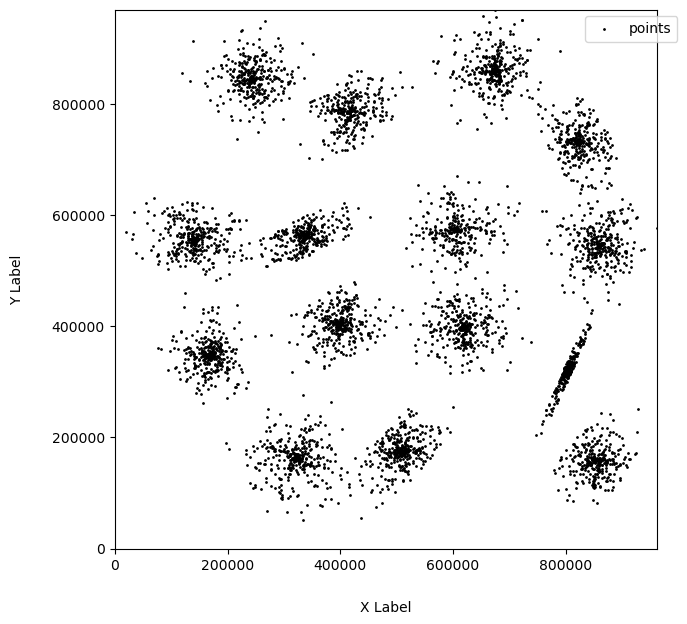

In [9]:
# Dataset Visualization

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

x = []
y = []

fp = open("./artset1.csv", 'r')

spots = fp.readlines() 
length = len(spots)

i = 0
x_max = 0
y_max = 0

while i < length: 
    pt = spots[i].strip().split(',')
    if float(pt[1]) > x_max: x_max = float(pt[1])
    if float(pt[2]) > y_max: y_max = float(pt[2])
        
    x.append(float(pt[1]))
    y.append(float(pt[2]))
    i += 1

fp.close()

fig = plt.figure(figsize=(7, 7))
plt.scatter(x, y, c='black', marker='o', s=1, label='points')

plt.xlabel('X Label', labelpad=20)
plt.ylabel('Y Label', labelpad=20)

plt.xlim([0, x_max])
plt.ylim([0, y_max])

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper right')
plt.show()


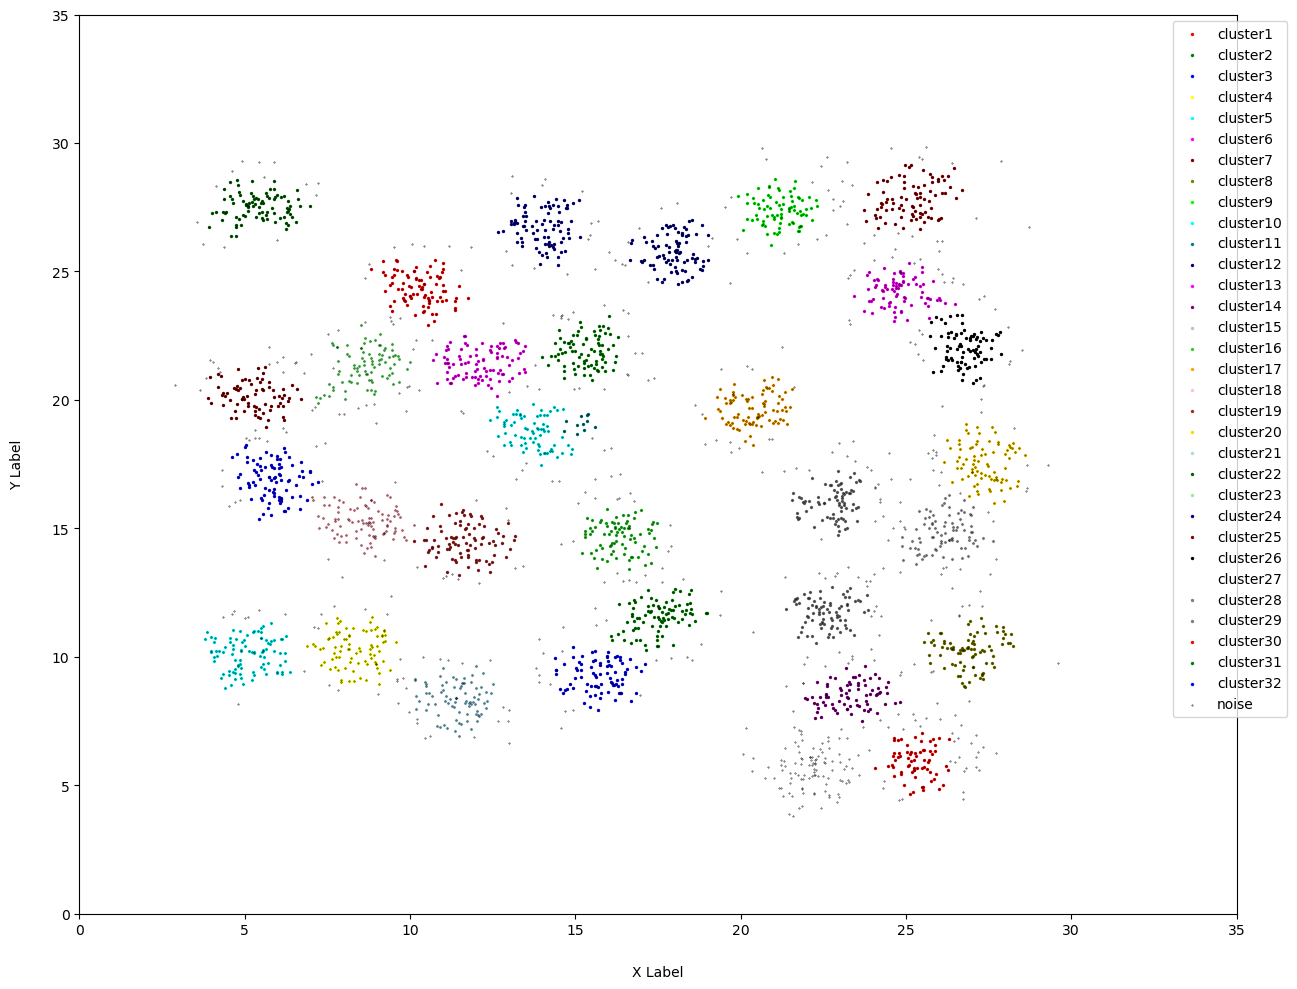

In [31]:
# DBSCAN result visualization

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

# Input Result of DBSCAN

cluster_num = 32
cluster_data = """
Cluster #1 => p1 p3 p4 p5 p6 p7 p8 p10 p14 p15 p17 p18 p19 p20 p21 p22 p23 p24 p25 p26 p28 p30 p31 p32 p35 p36 p38 p39 p40 p41 p42 p43 p44 p45 p48 p49 p52 p54 p55 p56 p57 p61 p62 p65 p67 p69 p71 p72 p73 p74 p75 p78 p79 p80 p82 p83 p84 p86 p87 p88 p91 p92 p93 p96 p97 p98 p99 p1088
Cluster #2 => p101 p102 p103 p104 p105 p106 p107 p108 p110 p111 p112 p113 p114 p115 p116 p118 p119 p120 p121 p122 p123 p124 p125 p128 p129 p130 p132 p133 p134 p135 p136 p138 p139 p140 p141 p142 p143 p145 p146 p147 p148 p149 p150 p151 p152 p155 p156 p157 p158 p159 p161 p162 p164 p165 p166 p167 p168 p169 p170 p171 p172 p173 p174 p176 p177 p178 p179 p180 p182 p183 p184 p185 p187 p188 p189 p190 p191 p192 p193 p194 p196 p197 p198 p199 p1203 p1210 p1248 p1289
Cluster #3 => p153 p1201 p1202 p1204 p1205 p1206 p1207 p1208 p1209 p1212 p1213 p1215 p1216 p1217 p1218 p1221 p1222 p1223 p1224 p1225 p1227 p1228 p1229 p1230 p1233 p1235 p1236 p1237 p1238 p1241 p1242 p1243 p1244 p1245 p1246 p1247 p1249 p1250 p1251 p1252 p1253 p1254 p1255 p1257 p1258 p1259 p1261 p1263 p1264 p1265 p1266 p1267 p1268 p1269 p1270 p1271 p1272 p1273 p1274 p1275 p1276 p1277 p1278 p1279 p1280 p1281 p1282 p1283 p1284 p1285 p1286 p1287 p1288 p1290 p1291 p1292 p1293 p1294 p1295 p1296 p1297 p1298 p1299 p1300
Cluster #4 => p201 p202 p204 p205 p207 p209 p210 p211 p212 p213 p214 p215 p216 p217 p218 p219 p220 p221 p222 p223 p224 p225 p226 p227 p228 p229 p230 p231 p232 p233 p235 p236 p237 p238 p240 p242 p243 p244 p245 p246 p247 p248 p251 p252 p253 p254 p255 p256 p257 p261 p262 p263 p264 p265 p266 p267 p268 p269 p270 p271 p273 p274 p275 p276 p277 p278 p280 p281 p282 p283 p285 p286 p287 p289 p290 p292 p293 p294 p295 p296 p297 p298 p299 p300
Cluster #5 => p260 p2902 p2903 p2904 p2905 p2906 p2907 p2908 p2909 p2910 p2911 p2912 p2913 p2914 p2915 p2916 p2917 p2918 p2919 p2921 p2922 p2923 p2924 p2925 p2926 p2927 p2928 p2929 p2930 p2931 p2932 p2933 p2934 p2935 p2936 p2937 p2938 p2941 p2942 p2943 p2944 p2945 p2946 p2947 p2948 p2949 p2950 p2951 p2952 p2953 p2954 p2955 p2956 p2957 p2958 p2959 p2960 p2961 p2962 p2963 p2964 p2966 p2967 p2968 p2969 p2970 p2971 p2972 p2973 p2974 p2975 p2976 p2977 p2978 p2980 p2981 p2982 p2983 p2984 p2986 p2987 p2988 p2989 p2990 p2991 p2993 p2994 p2995 p2996 p2997 p2998 p3000
Cluster #6 => p301 p302 p303 p304 p306 p307 p308 p314 p315 p316 p317 p318 p319 p320 p321 p322 p323 p324 p325 p327 p328 p329 p330 p331 p332 p333 p334 p335 p336 p337 p338 p339 p341 p343 p344 p345 p346 p347 p348 p349 p351 p352 p354 p355 p356 p358 p359 p360 p361 p362 p363 p365 p366 p367 p368 p369 p372 p373 p375 p379 p380 p381 p382 p383 p384 p385 p386 p388 p389 p390 p392 p393 p394 p395 p396 p397 p398 p399 p400 p2281 p2290 p2348
Cluster #7 => p402 p403 p406 p407 p408 p409 p410 p412 p413 p414 p415 p416 p417 p418 p419 p420 p421 p422 p423 p425 p426 p427 p428 p429 p430 p431 p433 p434 p435 p436 p437 p438 p439 p440 p442 p444 p445 p446 p448 p449 p450 p451 p453 p454 p455 p456 p459 p460 p461 p462 p464 p469 p470 p472 p474 p475 p476 p477 p478 p479 p480 p482 p484 p485 p486 p487 p488 p489 p491 p493 p494 p495 p497 p498 p500
Cluster #8 => p501 p502 p503 p504 p505 p506 p507 p508 p509 p510 p512 p513 p514 p515 p517 p518 p519 p520 p521 p522 p524 p526 p527 p529 p531 p532 p535 p536 p537 p538 p539 p541 p542 p543 p544 p545 p546 p547 p548 p549 p550 p551 p553 p554 p555 p556 p557 p558 p559 p560 p561 p562 p563 p564 p565 p566 p567 p568 p570 p571 p572 p573 p574 p575 p576 p577 p579 p580 p581 p582 p583 p584 p585 p587 p588 p589 p590 p591 p592 p593 p595 p596 p597 p598 p599 p600
Cluster #9 => p601 p602 p604 p605 p607 p608 p609 p611 p613 p614 p617 p619 p620 p621 p622 p623 p624 p625 p626 p627 p629 p630 p632 p633 p634 p635 p636 p638 p639 p640 p641 p642 p643 p645 p646 p647 p648 p649 p650 p651 p653 p654 p655 p657 p658 p659 p663 p664 p665 p666 p667 p668 p669 p671 p672 p673 p674 p675 p676 p677 p678 p679 p681 p682 p683 p684 p685 p686 p687 p688 p689 p690 p691 p692 p693 p694 p695 p696 p698 p699 p700
Cluster #10 => p701 p702 p703 p704 p705 p706 p707 p709 p710 p712 p713 p715 p717 p719 p720 p721 p722 p725 p726 p727 p730 p731 p732 p733 p734 p735 p737 p738 p740 p741 p743 p744 p745 p746 p747 p748 p749 p750 p751 p752 p753 p754 p755 p757 p758 p759 p762 p763 p764 p766 p767 p768 p769 p771 p773 p774 p775 p777 p778 p779 p780 p781 p783 p784 p786 p788 p789 p790 p795 p796 p797 p798 p799 p903
Cluster #11 => p711 p716 p723 p729 p739 p765 p770 p772 p785 p791 p794
Cluster #12 => p801 p802 p803 p804 p805 p806 p807 p808 p809 p810 p811 p812 p815 p816 p818 p820 p821 p822 p823 p824 p825 p827 p828 p829 p830 p831 p832 p834 p835 p836 p837 p838 p839 p840 p841 p842 p843 p844 p846 p847 p848 p849 p850 p851 p852 p853 p854 p855 p856 p859 p860 p861 p862 p863 p864 p865 p866 p867 p868 p869 p870 p871 p872 p873 p875 p877 p878 p879 p880 p881 p882 p883 p884 p885 p886 p887 p888 p889 p890 p891 p892 p893 p894 p895 p896 p897 p898 p900
Cluster #13 => p708 p718 p901 p902 p904 p906 p907 p908 p909 p910 p911 p912 p913 p914 p915 p916 p917 p919 p920 p921 p922 p924 p925 p926 p927 p928 p929 p930 p931 p932 p933 p934 p935 p936 p937 p938 p939 p940 p941 p943 p944 p945 p946 p947 p948 p949 p950 p951 p952 p953 p954 p955 p956 p957 p958 p959 p960 p961 p962 p963 p964 p965 p966 p967 p968 p969 p970 p971 p972 p973 p974 p975 p976 p979 p980 p981 p982 p983 p984 p985 p986 p987 p989 p990 p991 p993 p994 p995 p996 p997 p998 p999 p1000
Cluster #14 => p1001 p1002 p1003 p1004 p1006 p1007 p1008 p1009 p1010 p1011 p1012 p1015 p1016 p1017 p1018 p1019 p1020 p1021 p1022 p1023 p1025 p1026 p1027 p1028 p1029 p1030 p1031 p1032 p1033 p1035 p1036 p1037 p1038 p1039 p1041 p1042 p1043 p1044 p1045 p1046 p1049 p1051 p1052 p1053 p1054 p1055 p1056 p1057 p1058 p1059 p1060 p1061 p1062 p1064 p1065 p1068 p1069 p1070 p1071 p1073 p1076 p1077 p1078 p1079 p1080 p1084 p1085 p1087 p1089 p1090 p1092 p1094 p1095 p1097 p1098 p1099 p1100 p2479
Cluster #15 => p1101 p1102 p1103 p1105 p1106 p1108 p1109 p1110 p1112 p1113 p1116 p1118 p1119 p1120 p1121 p1122 p1123 p1124 p1125 p1127 p1128 p1129 p1130 p1131 p1133 p1134 p1136 p1137 p1138 p1139 p1140 p1141 p1143 p1144 p1145 p1146 p1147 p1148 p1150 p1151 p1152 p1154 p1156 p1158 p1159 p1160 p1161 p1162 p1163 p1164 p1165 p1166 p1167 p1168 p1169 p1170 p1172 p1173 p1174 p1176 p1178 p1179 p1180 p1181 p1182 p1185 p1186 p1187 p1189 p1190 p1191 p1192 p1193 p1194 p1195 p1196 p1197 p1198 p1199 p1200 p1747 p1748 p1755 p1772 p2504
Cluster #16 => p195 p1301 p1303 p1304 p1305 p1306 p1307 p1308 p1309 p1312 p1313 p1314 p1315 p1316 p1317 p1318 p1319 p1320 p1321 p1322 p1323 p1324 p1325 p1326 p1327 p1328 p1329 p1331 p1332 p1333 p1334 p1335 p1336 p1337 p1338 p1341 p1342 p1343 p1344 p1345 p1346 p1347 p1348 p1349 p1351 p1352 p1353 p1354 p1355 p1356 p1359 p1360 p1361 p1362 p1363 p1364 p1365 p1367 p1368 p1369 p1370 p1371 p1372 p1373 p1374 p1375 p1376 p1377 p1379 p1381 p1382 p1384 p1386 p1387 p1388 p1390 p1391 p1393 p1396 p1397 p1398 p1399 p1400
Cluster #17 => p1401 p1402 p1403 p1406 p1407 p1408 p1409 p1410 p1411 p1412 p1413 p1414 p1415 p1416 p1417 p1418 p1420 p1422 p1424 p1425 p1426 p1428 p1429 p1430 p1431 p1432 p1433 p1434 p1435 p1436 p1438 p1439 p1440 p1441 p1442 p1443 p1444 p1445 p1446 p1447 p1448 p1449 p1450 p1451 p1452 p1453 p1454 p1455 p1457 p1458 p1459 p1460 p1461 p1462 p1463 p1464 p1466 p1467 p1468 p1469 p1470 p1471 p1472 p1473 p1474 p1476 p1477 p1479 p1480 p1481 p1482 p1483 p1484 p1485 p1486 p1487 p1488 p1489 p1490 p1491 p1492 p1493 p1494 p1497 p1498 p1500
Cluster #18 => p1501 p1502 p1503 p1505 p1506 p1507 p1508 p1509 p1511 p1512 p1513 p1514 p1515 p1516 p1517 p1518 p1519 p1520 p1521 p1522 p1523 p1524 p1525 p1526 p1527 p1528 p1529 p1530 p1532 p1533 p1534 p1535 p1536 p1537 p1538 p1539 p1540 p1541 p1542 p1543 p1544 p1545 p1546 p1547 p1548 p1549 p1550 p1551 p1552 p1553 p1554 p1555 p1556 p1557 p1558 p1560 p1561 p1562 p1563 p1564 p1565 p1566 p1567 p1568 p1569 p1570 p1571 p1573 p1574 p1575 p1576 p1577 p1578 p1579 p1580 p1581 p1582 p1583 p1584 p1585 p1586 p1587 p1588 p1589 p1590 p1591 p1592 p1593 p1594 p1595 p1596 p1597 p1598 p1599 p1600 p3057 p3067
Cluster #19 => p1572 p1602 p1603 p1605 p1607 p1608 p1609 p1610 p1611 p1612 p1613 p1614 p1615 p1616 p1617 p1618 p1619 p1620 p1621 p1622 p1623 p1624 p1625 p1626 p1627 p1628 p1630 p1631 p1632 p1633 p1634 p1635 p1636 p1637 p1638 p1639 p1640 p1641 p1642 p1643 p1644 p1645 p1646 p1647 p1648 p1649 p1650 p1651 p1652 p1653 p1654 p1655 p1656 p1657 p1658 p1659 p1662 p1663 p1664 p1665 p1666 p1667 p1668 p1669 p1670 p1671 p1672 p1673 p1674 p1675 p1676 p1677 p1678 p1681 p1682 p1683 p1684 p1686 p1687 p1688 p1689 p1690 p1691 p1692 p1694 p1695 p1697 p1698 p1699 p1700
Cluster #20 => p1135 p1171 p1701 p1702 p1703 p1704 p1706 p1707 p1708 p1709 p1710 p1711 p1712 p1714 p1715 p1716 p1718 p1719 p1720 p1721 p1722 p1723 p1724 p1725 p1726 p1728 p1729 p1730 p1731 p1732 p1733 p1734 p1735 p1736 p1737 p1738 p1739 p1740 p1741 p1742 p1744 p1745 p1746 p1749 p1750 p1751 p1752 p1754 p1757 p1758 p1759 p1760 p1761 p1762 p1765 p1766 p1767 p1768 p1769 p1770 p1774 p1775 p1776 p1777 p1778 p1781 p1782 p1783 p1784 p1785 p1786 p1787 p1788 p1789 p1790 p1791 p1792 p1793 p1794 p1796 p1798 p1799
Cluster #21 => p249 p284 p1801 p1802 p1803 p1804 p1805 p1806 p1809 p1810 p1811 p1812 p1813 p1816 p1817 p1818 p1819 p1820 p1821 p1822 p1823 p1824 p1825 p1826 p1827 p1829 p1831 p1832 p1833 p1834 p1835 p1836 p1837 p1838 p1840 p1842 p1843 p1844 p1845 p1846 p1848 p1850 p1851 p1853 p1854 p1856 p1858 p1859 p1860 p1861 p1862 p1865 p1867 p1868 p1869 p1871 p1872 p1873 p1874 p1876 p1877 p1878 p1879 p1880 p1881 p1882 p1883 p1884 p1885 p1886 p1887 p1888 p1889 p1890 p1891 p1892 p1893 p1894 p1895 p1896 p1897 p1898 p1899
Cluster #22 => p1901 p1902 p1903 p1904 p1905 p1906 p1907 p1908 p1911 p1912 p1913 p1914 p1915 p1916 p1917 p1918 p1920 p1922 p1923 p1924 p1925 p1926 p1927 p1928 p1929 p1930 p1931 p1932 p1933 p1934 p1935 p1936 p1937 p1938 p1939 p1940 p1943 p1945 p1946 p1948 p1949 p1950 p1951 p1952 p1953 p1954 p1955 p1956 p1957 p1958 p1960 p1961 p1962 p1963 p1964 p1965 p1966 p1967 p1969 p1970 p1971 p1972 p1973 p1974 p1975 p1976 p1977 p1978 p1979 p1980 p1981 p1982 p1983 p1984 p1986 p1987 p1988 p1989 p1990 p1992 p1993 p1994 p1995 p1996 p1997 p1998 p1999
Cluster #23 => p468 p473 p2001 p2003 p2004 p2005 p2006 p2007 p2009 p2010 p2011 p2012 p2013 p2014 p2016 p2017 p2019 p2020 p2022 p2023 p2024 p2025 p2026 p2027 p2028 p2029 p2030 p2031 p2032 p2033 p2034 p2035 p2036 p2037 p2038 p2039 p2040 p2041 p2042 p2043 p2044 p2045 p2046 p2047 p2048 p2050 p2051 p2052 p2054 p2056 p2057 p2058 p2059 p2060 p2061 p2063 p2064 p2065 p2067 p2068 p2069 p2070 p2072 p2073 p2074 p2076 p2077 p2078 p2079 p2080 p2081 p2084 p2085 p2086 p2087 p2088 p2089 p2092 p2094 p2096 p2097 p2098 p2099 p2100 p2717 p2758
Cluster #24 => p2101 p2102 p2104 p2105 p2106 p2107 p2108 p2109 p2110 p2111 p2112 p2113 p2114 p2115 p2117 p2119 p2120 p2121 p2122 p2124 p2126 p2127 p2128 p2131 p2133 p2134 p2136 p2137 p2138 p2139 p2140 p2141 p2142 p2143 p2144 p2145 p2146 p2147 p2148 p2150 p2151 p2152 p2153 p2154 p2156 p2157 p2158 p2159 p2160 p2161 p2162 p2163 p2164 p2165 p2166 p2167 p2168 p2169 p2170 p2171 p2172 p2173 p2174 p2175 p2177 p2178 p2179 p2180 p2181 p2182 p2183 p2184 p2185 p2187 p2189 p2190 p2191 p2193 p2194 p2195 p2196 p2197 p2198 p2199 p2200
Cluster #25 => p353 p2201 p2202 p2203 p2204 p2205 p2206 p2207 p2208 p2209 p2210 p2211 p2213 p2214 p2215 p2216 p2218 p2221 p2222 p2223 p2225 p2226 p2227 p2228 p2229 p2231 p2232 p2235 p2236 p2237 p2238 p2239 p2240 p2241 p2242 p2243 p2244 p2245 p2246 p2249 p2250 p2251 p2252 p2253 p2254 p2255 p2256 p2257 p2258 p2259 p2260 p2261 p2262 p2263 p2264 p2265 p2267 p2268 p2269 p2270 p2271 p2272 p2273 p2274 p2275 p2277 p2278 p2279 p2280 p2282 p2283 p2284 p2285 p2287 p2288 p2289 p2291 p2293 p2294 p2295 p2296 p2297 p2298 p2299 p2300
Cluster #26 => p2301 p2302 p2303 p2304 p2306 p2307 p2308 p2309 p2310 p2311 p2312 p2314 p2315 p2316 p2317 p2318 p2319 p2320 p2321 p2322 p2323 p2325 p2326 p2327 p2328 p2330 p2331 p2332 p2333 p2334 p2335 p2338 p2339 p2340 p2341 p2342 p2343 p2344 p2345 p2346 p2347 p2350 p2351 p2352 p2353 p2354 p2355 p2356 p2357 p2358 p2359 p2360 p2361 p2362 p2363 p2364 p2365 p2366 p2367 p2368 p2370 p2371 p2372 p2373 p2374 p2375 p2376 p2377 p2379 p2380 p2382 p2383 p2384 p2386 p2388 p2390 p2392 p2393 p2394 p2395 p2396 p2398 p2400
Cluster #27 => p16 p76 p1024 p2401 p2402 p2403 p2404 p2405 p2407 p2409 p2410 p2411 p2412 p2413 p2414 p2415 p2416 p2417 p2418 p2420 p2421 p2422 p2423 p2424 p2425 p2426 p2427 p2428 p2429 p2430 p2431 p2432 p2433 p2434 p2435 p2436 p2437 p2440 p2441 p2442 p2443 p2445 p2446 p2448 p2449 p2450 p2451 p2452 p2453 p2454 p2456 p2457 p2459 p2460 p2461 p2462 p2463 p2464 p2465 p2467 p2468 p2469 p2470 p2471 p2472 p2473 p2475 p2477 p2478 p2482 p2483 p2484 p2485 p2486 p2488 p2489 p2490 p2491 p2492 p2493 p2494 p2495 p2496 p2497 p2498 p2500
Cluster #28 => p2501 p2502 p2503 p2505 p2506 p2508 p2510 p2511 p2512 p2513 p2514 p2515 p2516 p2517 p2518 p2519 p2520 p2521 p2522 p2523 p2524 p2525 p2526 p2527 p2528 p2530 p2531 p2532 p2534 p2535 p2536 p2537 p2538 p2539 p2543 p2544 p2545 p2546 p2547 p2548 p2549 p2552 p2553 p2555 p2557 p2558 p2559 p2560 p2561 p2564 p2565 p2566 p2567 p2568 p2569 p2570 p2571 p2572 p2574 p2575 p2577 p2579 p2580 p2582 p2583 p2584 p2585 p2586 p2587 p2588 p2589 p2590 p2592 p2594 p2595 p2596 p2597 p2599 p2600
Cluster #29 => p2601 p2603 p2604 p2606 p2608 p2609 p2610 p2611 p2612 p2613 p2615 p2616 p2618 p2619 p2621 p2622 p2623 p2626 p2627 p2628 p2630 p2631 p2632 p2634 p2635 p2636 p2637 p2638 p2639 p2641 p2642 p2644 p2645 p2647 p2648 p2649 p2650 p2651 p2652 p2654 p2655 p2656 p2657 p2658 p2659 p2660 p2661 p2662 p2663 p2664 p2666 p2667 p2669 p2670 p2671 p2672 p2673 p2674 p2675 p2676 p2677 p2678 p2680 p2681 p2682 p2683 p2684 p2685 p2686 p2687 p2688 p2689 p2690 p2691 p2692 p2693 p2695 p2696 p2697 p2698 p2699 p2700
Cluster #30 => p978 p2701 p2702 p2703 p2704 p2706 p2707 p2708 p2710 p2711 p2713 p2714 p2715 p2716 p2719 p2720 p2721 p2722 p2723 p2724 p2725 p2726 p2727 p2728 p2729 p2730 p2731 p2733 p2734 p2735 p2736 p2737 p2738 p2739 p2740 p2741 p2742 p2743 p2745 p2746 p2747 p2748 p2749 p2750 p2751 p2753 p2754 p2755 p2756 p2757 p2759 p2760 p2761 p2762 p2764 p2765 p2766 p2767 p2768 p2769 p2770 p2771 p2772 p2773 p2774 p2775 p2776 p2777 p2778 p2779 p2780 p2781 p2782 p2783 p2784 p2786 p2787 p2788 p2789 p2790 p2791 p2794 p2795 p2796 p2797 p2798 p2799 p2800
Cluster #31 => p2801 p2802 p2803 p2805 p2807 p2809 p2811 p2813 p2815 p2816 p2818 p2819 p2820 p2821 p2822 p2823 p2824 p2825 p2826 p2828 p2829 p2830 p2832 p2833 p2834 p2835 p2836 p2838 p2840 p2841 p2842 p2843 p2844 p2845 p2846 p2847 p2848 p2849 p2850 p2851 p2852 p2853 p2854 p2855 p2856 p2857 p2858 p2859 p2860 p2861 p2864 p2865 p2866 p2867 p2868 p2869 p2870 p2871 p2872 p2873 p2874 p2875 p2876 p2877 p2878 p2879 p2881 p2883 p2885 p2886 p2887 p2888 p2889 p2890 p2891 p2893 p2894 p2896 p2897 p2898 p2899 p2900
Cluster #32 => p496 p3001 p3002 p3003 p3004 p3005 p3006 p3007 p3008 p3009 p3010 p3011 p3012 p3013 p3015 p3016 p3017 p3018 p3019 p3020 p3021 p3022 p3023 p3024 p3026 p3027 p3028 p3029 p3031 p3032 p3033 p3034 p3035 p3036 p3037 p3038 p3039 p3040 p3041 p3042 p3043 p3044 p3045 p3046 p3047 p3048 p3049 p3050 p3051 p3052 p3053 p3054 p3055 p3056 p3058 p3059 p3060 p3061 p3063 p3064 p3065 p3070 p3071 p3073 p3074 p3075 p3076 p3077 p3078 p3079 p3080 p3081 p3082 p3083 p3084 p3085 p3086 p3087 p3088 p3089 p3090 p3091 p3092 p3093 p3096 p3097 p3098 p3099
"""

clusters = []
for line in cluster_data.strip().split("\n"):
    parts = line.split("=>")
    if len(parts) == 2:
        cluster_numbers = [int(p[1:]) for p in parts[1].strip().split()]
        clusters.append(cluster_numbers)

# Allocate x, y, z 
x = [[] for _ in range(cluster_num)]
y = [[] for _ in range(cluster_num)]

noise_x = []
noise_y = []

# Match Data
fp = open("./artd-31.csv", 'r')

spots = fp.readlines() 
length = len(spots)

i = 0
x_max = 0
y_max = 0

while i < length: 
    pt = spots[i].strip().split(',')
    if float(pt[1]) > x_max: x_max = float(pt[1])
    if float(pt[2]) > y_max: y_max = float(pt[2])

    for k in range(cluster_num + 1):
        if (k == cluster_num):
            noise_x.append(float(pt[1]))
            noise_y.append(float(pt[2]))
        elif ((i + 1) in clusters[k]):
            x[k].append(float(pt[1]))
            y[k].append(float(pt[2]))
    i += 1

fp.close()

fig = plt.figure(figsize=(13, 10))

colors = [
    "red", "green", "blue", "yellow", "cyan", "magenta", "maroon", "olive", "lime", "aqua", "teal", "navy",
    "fuchsia", "purple", "silver", "limegreen", "orange", "pink", "brown", "gold", "lightblue", "darkgreen", "lightgreen", 
    "darkblue", "darkred", "black", "white", "gray", "grey", "red", "green", "blue", "yellow", "cyan", "magenta", "maroon"
]

for i in range(cluster_num):
    plt.scatter(x[i], y[i], c=colors[i], marker='o', s=2, label='cluster'+str(i + 1))

plt.scatter(noise_x, noise_y, c='black', marker='o', s=0.1, label='noise')


plt.xlim([0, 35])
plt.ylim([0, 35])

plt.xlabel('X Label', labelpad=20)
plt.ylabel('Y Label', labelpad=20)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper right')
plt.tight_layout()

plt.show()

